#Assignment 3 : logistic regression

In [3]:
import pandas as pd

In [4]:
pima = pd.read_csv("diabetes.csv")
pima.columns = ['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']


In [5]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
feature_cols = ['pregnant','insulin','bmi','age','glucose','bp','pedigree']
X = pima[feature_cols] 
y = pima.label 

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 16)

In [8]:
from sklearn.linear_model import LogisticRegression


In [9]:
logreg = LogisticRegression(random_state = 16)
logreg.fit (X_train, y_train)

y_pred = logreg.predict(X_test)

c:\Users\vivek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
from sklearn import metrics

In [11]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[115,  10],
       [ 25,  42]])

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


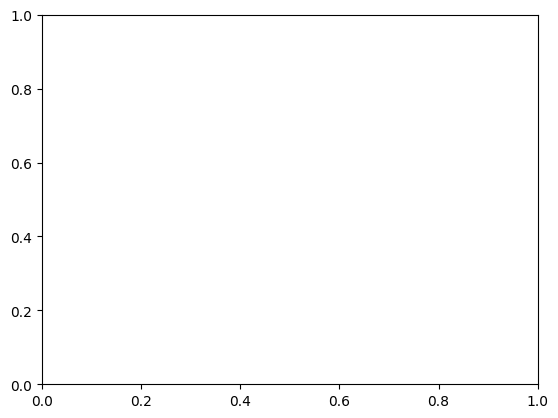

In [13]:
class_name = [0,1]
fig, ax = plt.subplots()

([<matplotlib.axis.YTick at 0x183da57e010>,
 [Text(0, 0, '0'), Text(0, 1, '1')])

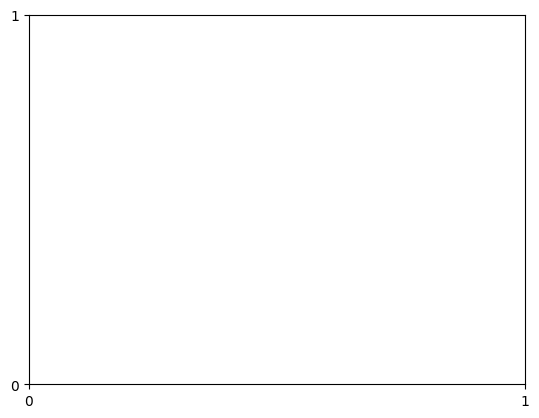

In [14]:
tick_marks = np.arange(len(class_name))
plt.xticks(tick_marks, class_name)
plt.yticks(tick_marks, class_name)

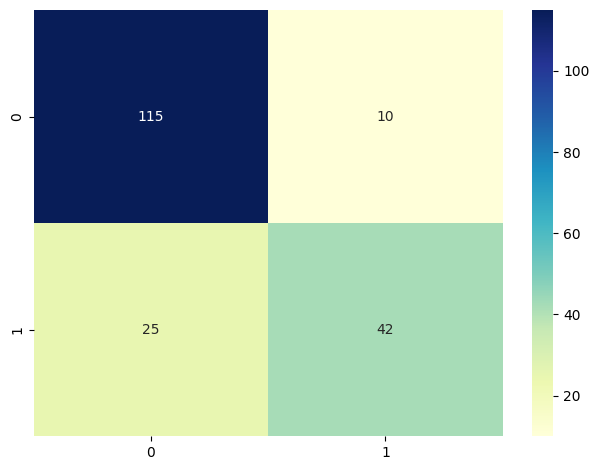

In [15]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()

Text(0.5, 0, 'Predicted label')

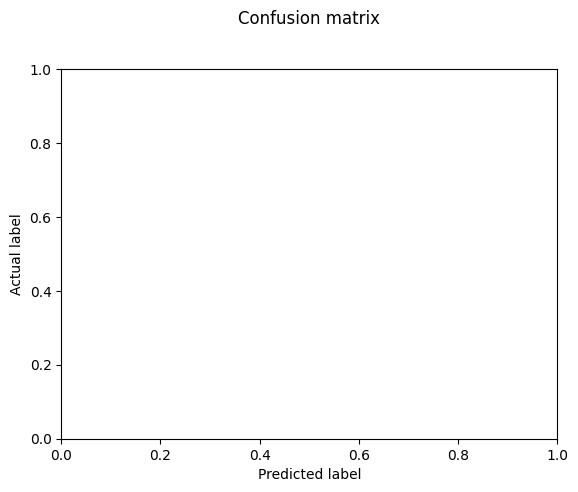

In [16]:
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [ ]:
from sklearn.metrics import classification_report
target_names= ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names= target_names))


                  precision    recall  f1-score   support

without diabetes       0.82      0.92      0.87       125
   with diabetes       0.81      0.63      0.71        67

        accuracy                           0.82       192
       macro avg       0.81      0.77      0.79       192
    weighted avg       0.82      0.82      0.81       192



In [18]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]

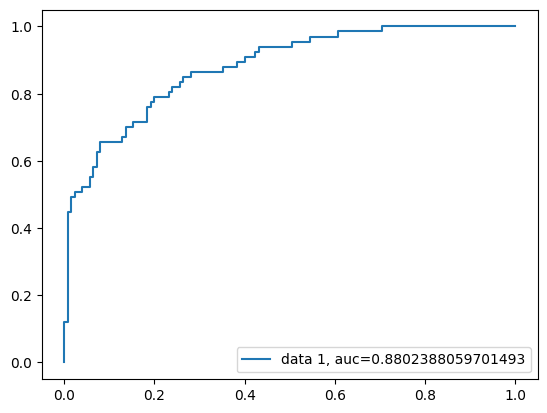

In [19]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
#sigmod function
